In [1]:
import pandas as pd

df = pd.read_csv("Trips_2018.csv")

In [2]:
import os

#count cpu cores
cores = os.cpu_count()
print(cores)

16


In [3]:
from sklearn.preprocessing import LabelEncoder


In [4]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
print(df.dtypes)

Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object


In [6]:
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')

In [7]:
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')

In [8]:
print(df.dtypes)

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
dtype: object


In [9]:
print(df['usertype'].unique())

['Subscriber' 'Customer']


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['usertype'] = label_encoder.fit_transform(df['usertype'])

In [11]:
print(df['gender'].unique())

[1 0 2]


In [ ]:
from sklearn.cluster import KMeans
#!setx LOKY_Min_CPU_COUNT 6

distortions = []
K = range(1, 25) 

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['start_station_latitude', 'start_station_longitude']])
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Generate synthetic dataset with 8 random clusters
X =df[['start_station_latitude', 'start_station_longitude']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,25))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


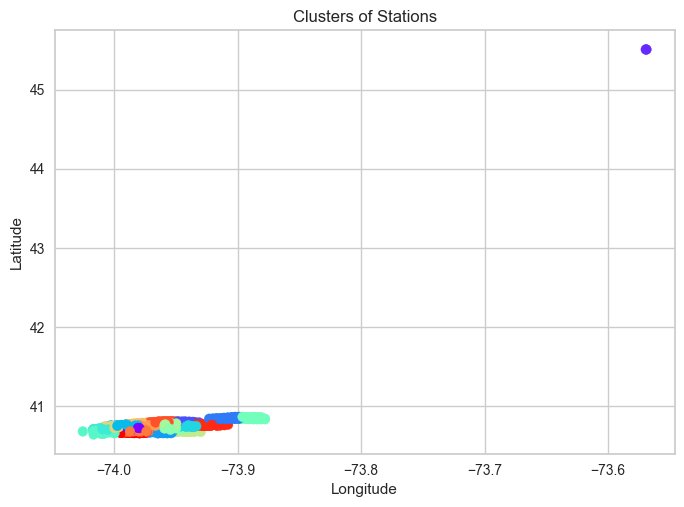

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

kmeans = KMeans(n_clusters=20, random_state=0).fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['cluster'] = kmeans.labels_

plt.scatter(stations['start_station_longitude'], stations['start_station_latitude'], c=stations['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.show()

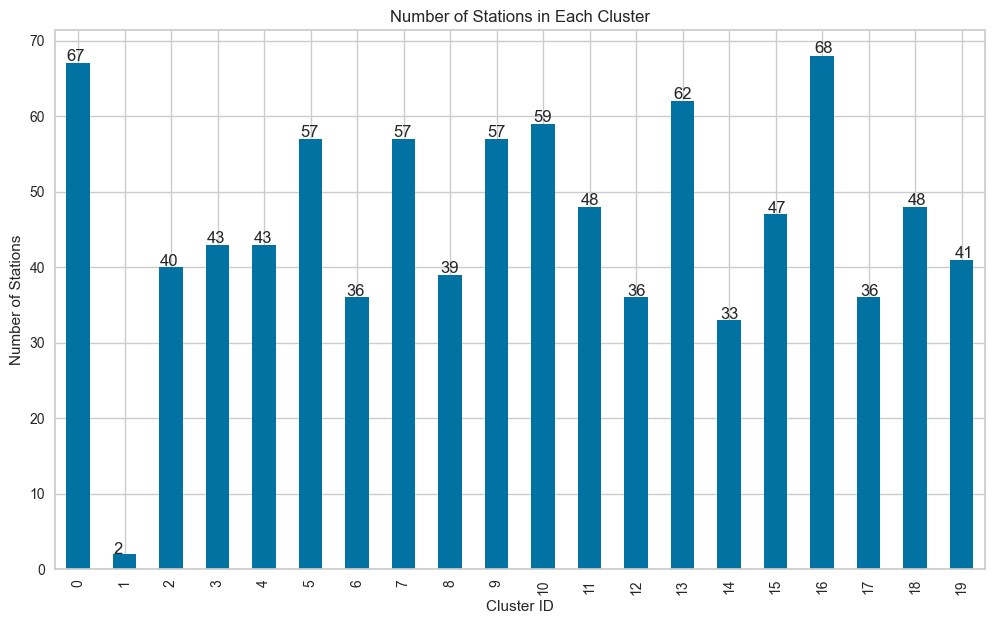

In [16]:
cluster_counts = stations.groupby('cluster').size()

ax = cluster_counts.plot(kind='bar', figsize=(12,7))
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.title('Number of Stations in Each Cluster')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


In [17]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

        start_station_id  start_station_latitude  start_station_longitude  \
676612            3488.0               45.506364               -73.569463   
714485            3650.0               45.506264               -73.568906   

        cluster  
676612        1  
714485        1  


These 2 stations are located in Montreal, Canada. Therefore, they will be discarded.

In [18]:
stations = stations[stations['cluster'] != 1]

In [19]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude,cluster
0,72.0,40.767272,-73.993929,5
1324,79.0,40.719116,-74.006667,7
2430,82.0,40.711174,-74.000165,7
2866,83.0,40.683826,-73.976323,16
3551,119.0,40.696089,-73.978034,16


In [20]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

Empty DataFrame
Columns: [start_station_id, start_station_latitude, start_station_longitude, cluster]
Index: []


In [21]:
merged_df = df.merge(stations[['start_station_id', 'cluster']], on='start_station_id', how='left')

merged_df.head(300)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,5.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,5.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,5.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,5.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,790,2018-01-11 10:38:44.796,2018-01-11 10:51:54.996,72.0,40.767272,-73.993929,441.0,40.756014,-73.967416,17694,1,1987,2,5.0
296,296,768,2018-01-11 10:46:09.911,2018-01-11 10:58:58.077,72.0,40.767272,-73.993929,359.0,40.755103,-73.974987,30798,1,1992,1,5.0
297,297,1378,2018-01-11 11:13:37.024,2018-01-11 11:36:35.187,72.0,40.767272,-73.993929,3256.0,40.727714,-74.011296,30440,1,1978,1,5.0
298,298,291,2018-01-11 11:59:57.202,2018-01-11 12:04:49.054,72.0,40.767272,-73.993929,478.0,40.760301,-73.998842,17204,1,1964,1,5.0


Text(0.5, 1.0, 'Stations Locations')

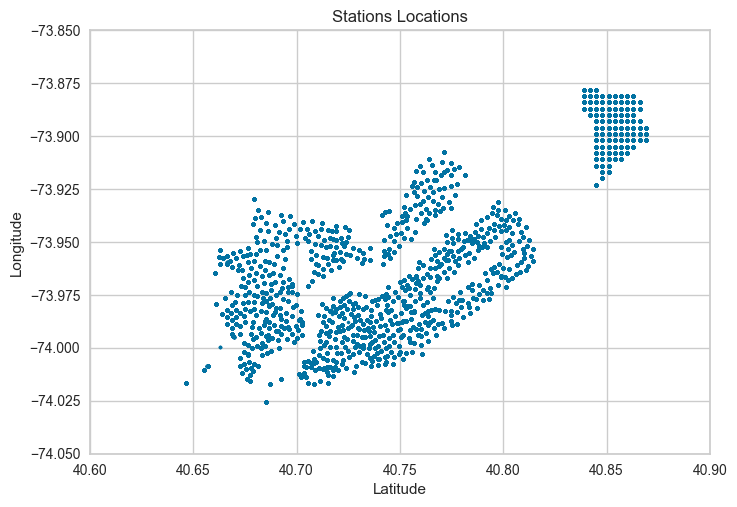

In [27]:
plt.scatter(merged_df['start_station_latitude'], merged_df['start_station_longitude'], s=5)
plt.xlim([40.6, 40.9])
plt.ylim([-74.05, -73.85])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Stations Locations")

In [ ]:
#merged_df.head(300)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,4.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,4.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,4.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,4.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,790,2018-01-11 10:38:44.796,2018-01-11 10:51:54.996,72.0,40.767272,-73.993929,441.0,40.756014,-73.967416,17694,1,1987,2,4.0
296,296,768,2018-01-11 10:46:09.911,2018-01-11 10:58:58.077,72.0,40.767272,-73.993929,359.0,40.755103,-73.974987,30798,1,1992,1,4.0
297,297,1378,2018-01-11 11:13:37.024,2018-01-11 11:36:35.187,72.0,40.767272,-73.993929,3256.0,40.727714,-74.011296,30440,1,1978,1,4.0
298,298,291,2018-01-11 11:59:57.202,2018-01-11 12:04:49.054,72.0,40.767272,-73.993929,478.0,40.760301,-73.998842,17204,1,1964,1,4.0


In [63]:
df=merged_df
#print the total rows of df
print(df.shape[0])


17841015


In [32]:
# find min, max, median, mean, std of trip duration
print(df['tripduration'].describe())


count    1.754834e+07
mean     9.887432e+02
std      1.889584e+04
min      6.100000e+01
25%      3.580000e+02
50%      6.050000e+02
75%      1.060000e+03
max      1.951005e+07
Name: tripduration, dtype: float64


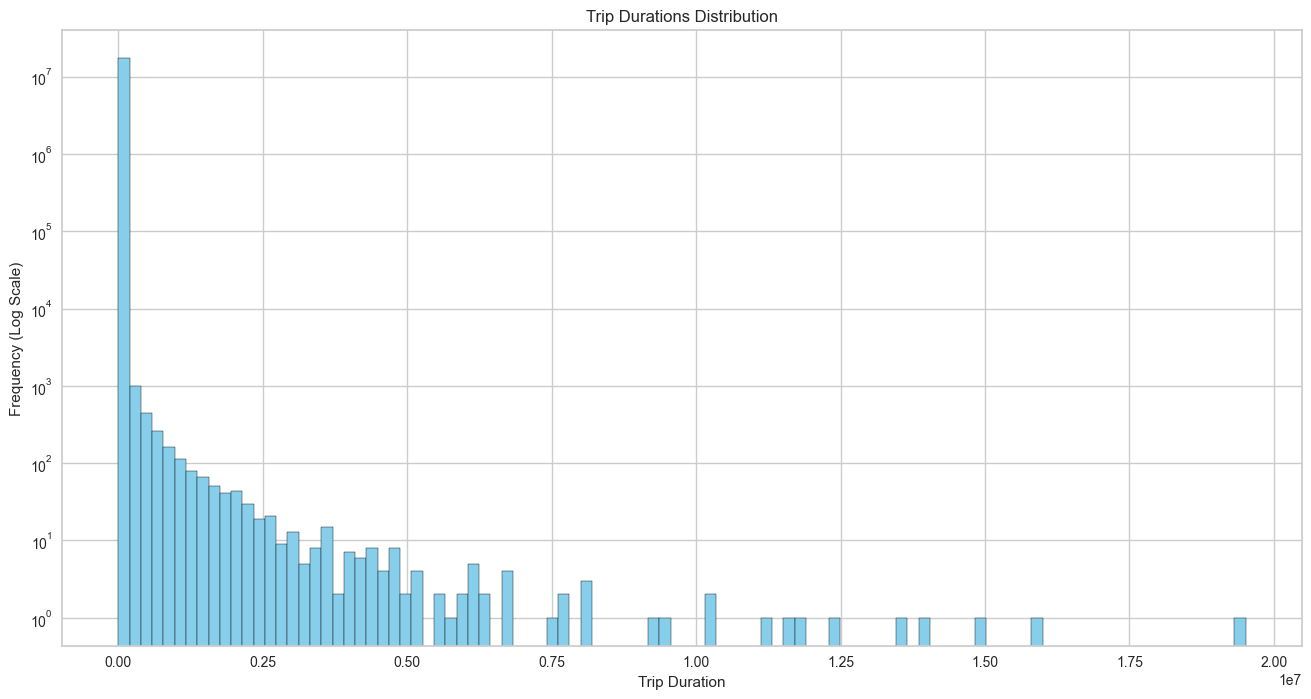

In [61]:
trip_durations = df['tripduration']

plt.figure(figsize=(16, 8))
plt.hist(trip_durations, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Trip Durations Distribution')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()



In [92]:
#Filtering the data at the 1st percentile will include those trips with durations longer than 99% of the dataset. 
#Filtering at the 99th percentile will include those trips with durations shorter than 99% of the dataset.

# Calculate the 0.1st and 999th percentiles
percentile_1 = df['tripduration'].quantile(0.001)
percentile_99 = df['tripduration'].quantile(0.999999)
# i want to print the tripdurations of those who are in the 1st and 99th percentile
print('trip_durations :', percentile_1, percentile_99)

# Filter data based on percentiles
points_within_1_percentile = df[df['tripduration'] <= percentile_1]
points_within_99_percentile = df[df['tripduration'] >= percentile_99]

print(f"Number of points in the 1st percentile: {len(points_within_1_percentile)}")
print(f"Number of points in the 99th percentile: {len(points_within_99_percentile)}")


trip_durations : 66.0 7579847.566582724
Number of points in the 1st percentile: 18486
Number of points in the 99th percentile: 18


In [94]:
# find min and 0.1, 0.5, 0.1 quantile of trip duration along with thenumber of points for each one of them
print(df['tripduration'].quantile([.1, .05, .02, .01, .001, .0001, .00001]))
# find the 90,95,98,99 percentile of trip duration
print(df['tripduration'].quantile([.90,.95,.98,.99,.999,.9999,.99999]))

0.10000    226.0
0.05000    171.0
0.02000    124.0
0.01000    100.0
0.00100     66.0
0.00010     61.0
0.00001     61.0
Name: tripduration, dtype: float64
0.90000    1.668000e+03
0.95000    2.097000e+03
0.98000    2.722000e+03
0.99000    3.718000e+03
0.99900    2.000997e+04
0.99990    3.433650e+05
0.99999    2.252608e+06
Name: tripduration, dtype: float64


In [ ]:
# Assuming 'df' is your DataFrame and 'tripduration' is the column you want to filter
# Calculate the 1st and 99th percentiles
lower_percentile = df['tripduration'].quantile(0.01)
upper_percentile = df['tripduration'].quantile(0.99)

# Filter the DataFrame based on the percentiles
#filtered_df = df[(df['tripduration'] >= lower_percentile) & (df['tripduration'] <= upper_percentile)]


In [95]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,5.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,5.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,5.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,5.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,5.0


In [150]:
# make a list of 20 lists that will include the id's of the stations in each cluster
cluster_stations = []
for i in range(20):
    cluster_stations.append(stations[stations['cluster'] == i]['start_station_id'].tolist())

# make a list of 20 lists that will include the id's of the stations in each cluster
print(len(cluster_stations))

20


In [152]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude,cluster
0,72.0,40.767272,-73.993929,5
1324,79.0,40.719116,-74.006667,7
2430,82.0,40.711174,-74.000165,7
2866,83.0,40.683826,-73.976323,16
3551,119.0,40.696089,-73.978034,16


In [153]:
# add a "cluster_arrived" column at the df dataframe, that will be the cluster in which the "end_station_id" is included.(use the list_of_lists_ list)
# Assuming df is your DataFrame and 'end_station_id' is a column in your DataFrame
# Creating mappings
start_station_cluster_mapping = start_stations.set_index('start_station_id')['start_cluster_id'].to_dict()
end_station_cluster_mapping = end_stations.set_index('end_station_id')['end_cluster_id'].to_dict()

# Creating df2
df2 = df.copy()
df2['start_cluster_id'] = df2['start_station_id'].map(start_station_cluster_mapping)
df2['end_cluster_id'] = df2['end_station_id'].map(end_station_cluster_mapping)
df2 = df2[['starttime', 'stoptime', 'start_station_id', 'start_cluster_id', 'end_station_id', 'end_cluster_id']]


KeyboardInterrupt: 

In [96]:
# Calculate total demand (arrivals) for each cluster
cluster_demand = df.groupby('cluster').size()

# Find the cluster with the highest demand
cluster_highest_demand = cluster_demand.idxmax()

# Create a new DataFrame with data points only from the cluster with the highest demand
data_from_highest_demand_cluster = df[df['cluster'] == cluster_highest_demand]
#This code groups the data by the 'cluster' column and counts the occurrences of each 

In [97]:
data_from_highest_demand_cluster.head() 

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
4183,4183,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1,1979,2,13.0
4184,4184,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1,1969,1,13.0
4185,4185,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1,1966,1,13.0
4186,4186,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1,1992,1,13.0
4187,4187,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1,1991,2,13.0


In [99]:
data_from_highest_demand_cluster['cluster'].unique()

array([13.])

In [100]:
#print the total rows of data_from_highest_demand_cluster
print(data_from_highest_demand_cluster.shape[0])

3031560


In [102]:
print(3031560/17841015)


0.16992082569293282


In [105]:
cl13Data = data_from_highest_demand_cluster
cl13Data.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
4183,4183,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1,1979,2,13.0
4184,4184,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1,1969,1,13.0
4185,4185,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1,1966,1,13.0
4186,4186,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1,1992,1,13.0
4187,4187,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1,1991,2,13.0
